<B> Problem Statement:
    
A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.  

In [1]:
# import relevant librarys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# other important library will import when required

In [2]:
# import warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# graph style
sns.set_style('darkgrid')

In [4]:
# import dataset

df = pd.read_csv('day.csv')

In [5]:
# take a look at dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# checking for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking for null values

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Convering the columns into proper formats

# Converting date to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday']) 

In [9]:
df.mnth.value_counts()

# all 12 months have alomst same records

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [10]:
df.weathersit.value_counts()

# the dataset dosen't have heavy rain records

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [11]:
# look for the description of variables

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


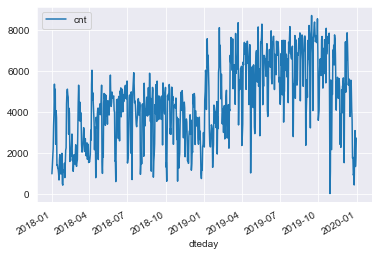

In [12]:
# Checking the variation in total order over the 2 year span

df.plot.line(x='dteday', y='cnt')
plt.show()

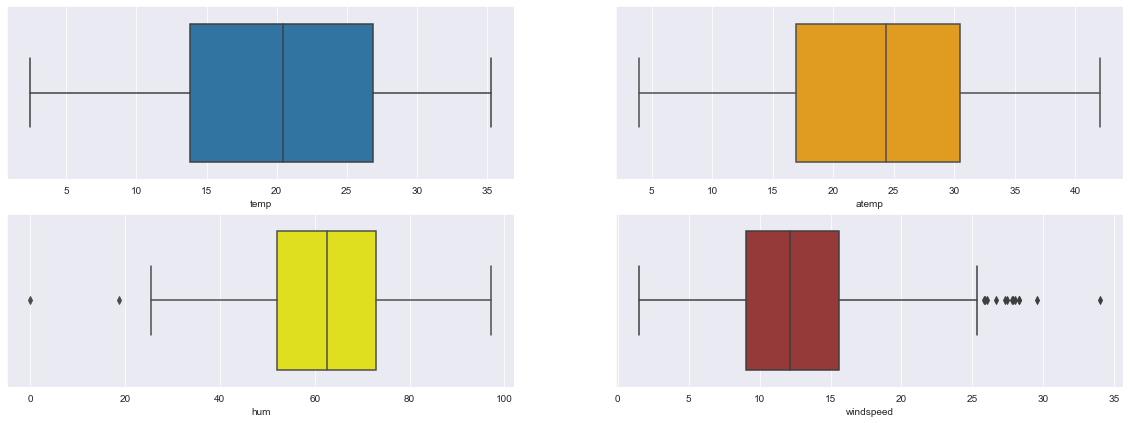

In [13]:
# analysing the weather parameters of city

plt.figure(figsize=(20, 7))
plt.subplot(2,2,1)
sns.boxplot(x = 'temp', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'atemp', data = df, color= 'orange')
plt.subplot(2,2,3)
sns.boxplot(x = 'hum', data = df, color= 'yellow')
plt.subplot(2,2,4)
sns.boxplot(x = 'windspeed', data = df, color= 'brown')
plt.show()

<B> Observation:
- Temperature: The mean and median temp of the city is about 20oC. The temperature of the city varies from 2oC to 35oC.

- Humidity: City records mean and median humidity of 62 approx, which can reach upto 97 and minimum of 0. 

- Windspeed: The average and median windspeed is reported as 12, and it can reach between 1.0 to 34.0 units. The outliers are observed on higherside of the windspeed, reason might be extreme weather.

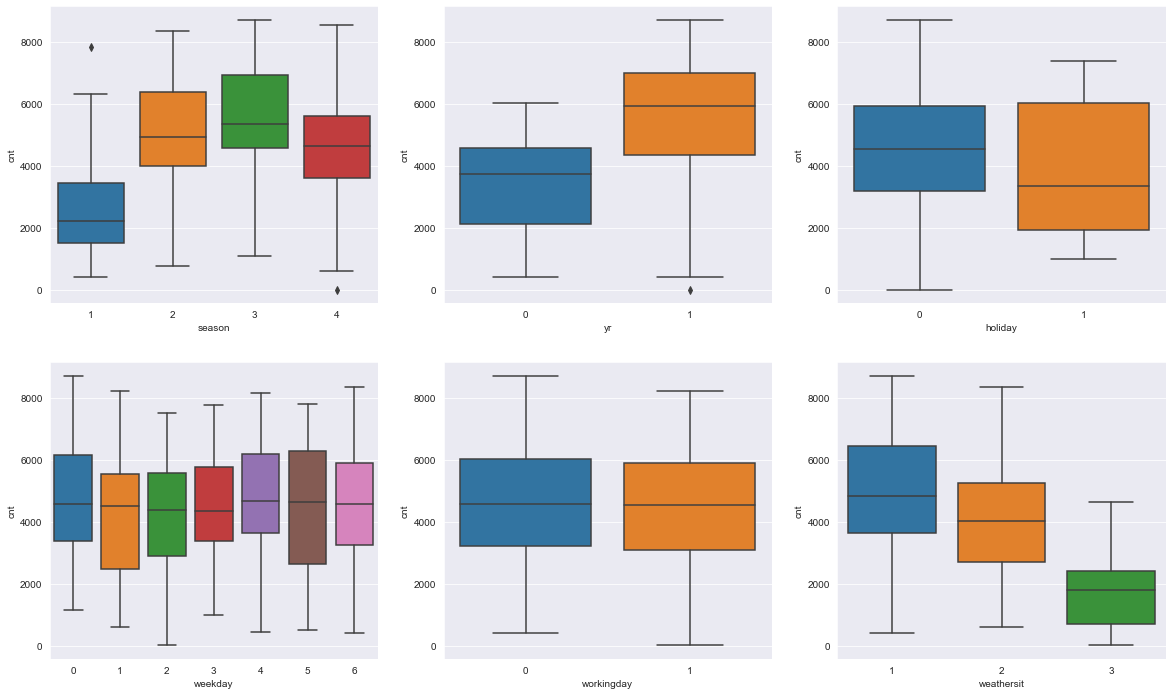

In [14]:
# analysing other categorical variables with total count of rental bikes.

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

<B> Observation:
- Season: In fall, summer and winter season's the total bike rental count is more as compared to spring season.

- Year: The total quantity of rentals of bikes is increases during 2019 as compared to 2018.

- Weekday: the median of bike rentals is same throughout all weekdays, but the lowest booking cont is recorded during Tuesday. 

- Weathersit: When the weather is clear people tends to rent the bikes more, in snowy weather frequency of bike rent drops and in rainy days people has not rented the bikes. 

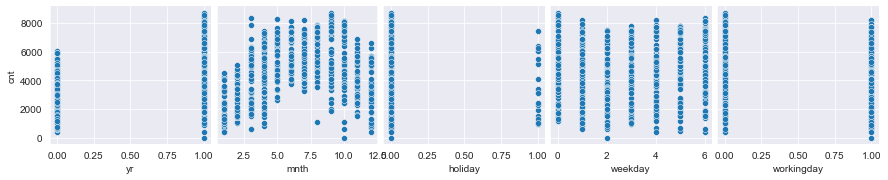

In [15]:
# finding correlation between days and total count

sns.pairplot(df, x_vars=['yr','mnth', 'holiday', 'weekday','workingday'], y_vars='cnt', kind='scatter')
plt.show()

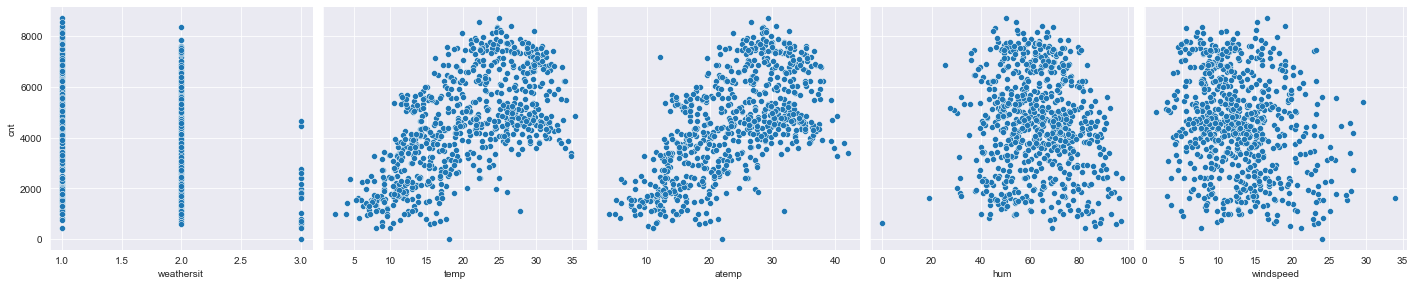

In [16]:
# finding correlation between weather parameters and total count
sns.pairplot(df, x_vars=['weathersit','temp','atemp','hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')

plt.show()

<B> Observation:

- The corrlation between rental count and tempearture, shows upward positive trend. 
- The corrlation between rental count and humidity, windspeed is inversily proportional as these type of environment is not suitable for riding bikes.

In [17]:
# Checking the mean of total rental count in a day

df.cnt.mean()

4508.006849315068

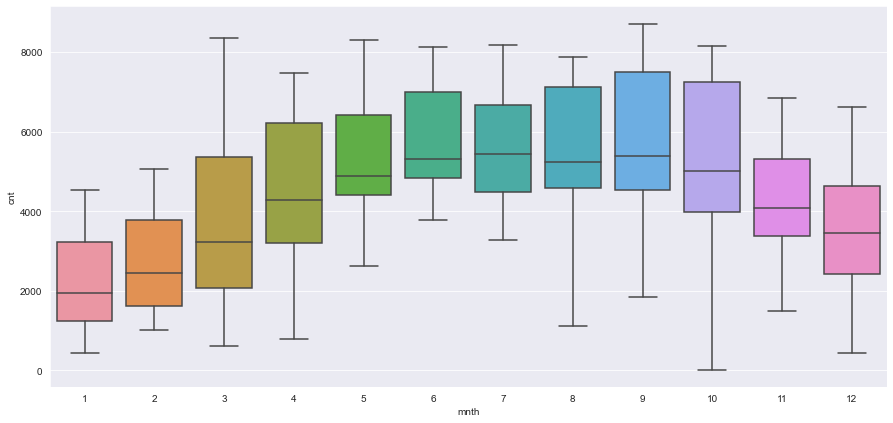

In [18]:
#Monthwise variation in the total rental count

plt.figure(figsize=(15, 7))

sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.show()

<B> Observation:
    
- The mean bike rental count in a day is 4508 nos. The monthwise distribution shows in april to november month report more rentals than overall mean.

In [19]:
# Formatting in categorical variables 

df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df['mnth'] = df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df['weekday'] = df['weekday'].map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 0: 'Sun'})
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'Snow', 4:'Rain'})

In [20]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,Spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


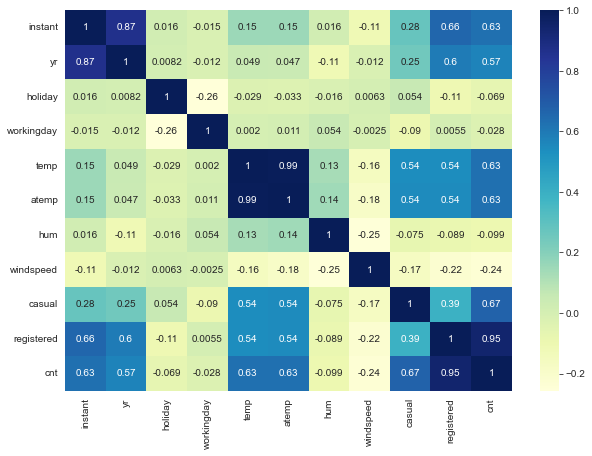

In [21]:
# Checking correlation with heatmap

plt.figure(figsize = (10,7))        # Size of the figure
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")

plt.show()

<B> Observation:
- The total count is sum of casual and registered variables, hence it is showing high correlation among themselves, its better to drop it (Dropped in later stage of analysis).
- Similarly, year and temp giving strong positive correlation indicating it is important factor to build the model.

#### Creating Dummy variables in categorical columns

- Creating Dummy variables for:
    1. season 
    2. mnth 
    3. weekday
    4. weathersit 

In [22]:
# Creating the dummy variables for season columns

sea = pd.get_dummies(df['season'], drop_first= True) 

In [23]:
# Join the two dataframes

df = pd.concat([df, sea], axis =1)

In [24]:
# Creating the dummy variables for mnth columns

mo = pd.get_dummies(df['mnth'], drop_first= True) 

# Join the two dataframes

df = pd.concat([df, mo], axis =1)

In [25]:
# Creating the dummy variables for Weekday columns

wd = pd.get_dummies(df['weekday'], drop_first= True) 

# Join the two dataframes

df = pd.concat([df, wd], axis =1)

In [26]:
# Creating the dummy variables for weathersit columns

ws = pd.get_dummies(df['weathersit'], drop_first= True) 

# Join the two dataframes

df = pd.concat([df, ws], axis =1)

In [27]:
len(df.columns)

38

In [28]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Snow
0,1,2018-01-01,Spring,0,Jan,0,Mon,1,Cloudy,14.110847,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,Spring,0,Jan,0,Tue,1,Cloudy,14.902598,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,Spring,0,Jan,0,Wed,1,Clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,Spring,0,Jan,0,Thu,1,Clear,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,Spring,0,Jan,0,Fri,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Droping some variable for the ease of further analysis

ndf = df.drop(['instant','dteday', 'season', 'mnth', 'weekday',  'weathersit','atemp', 'casual', 'registered'], axis = 1)

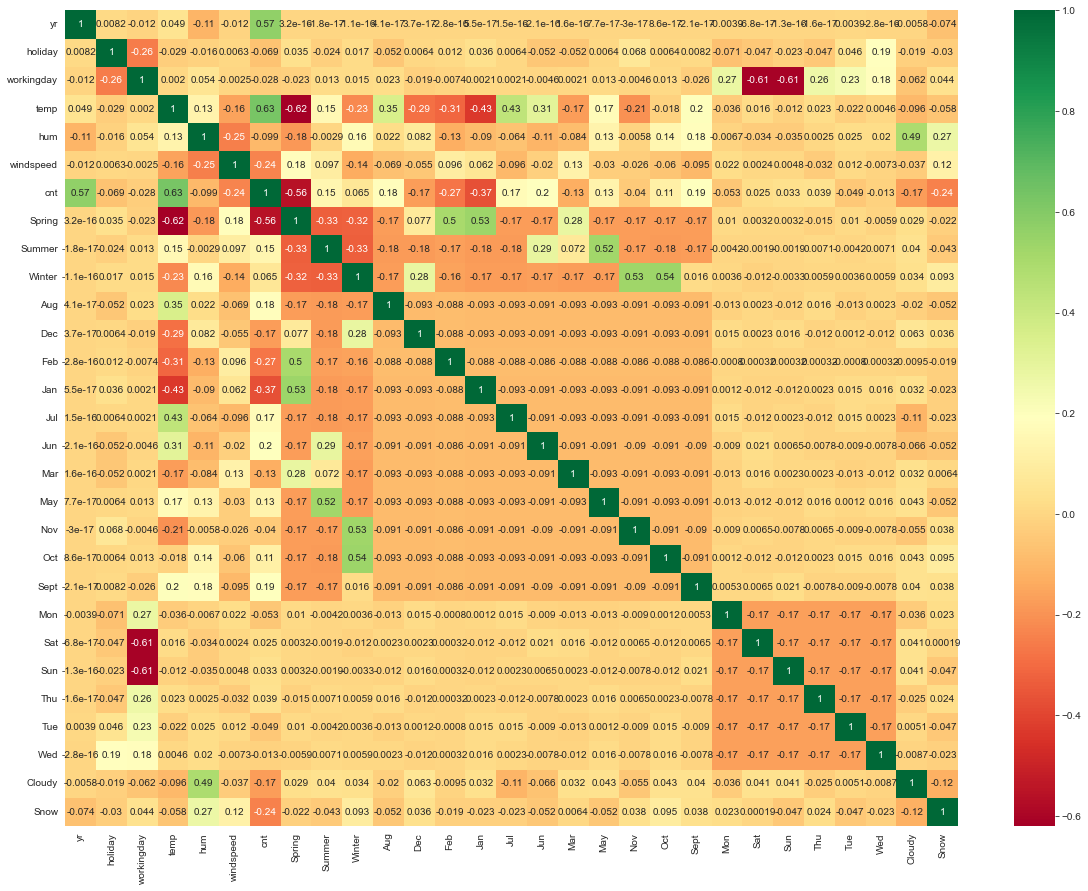

In [30]:
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(ndf.corr(),annot = True, cmap="RdYlGn")
plt.show()

### Adopting Recursive Feature Elimination (RFE) method

In [31]:
# import RFE and linear regression library

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# look for number of columns in dataset

len(ndf.columns)

29

In [33]:
# look for variable names

ndf.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Cloudy', 'Snow'],
      dtype='object')

#### Dividing the dataframe into train test dataset

In [34]:
ndf_train, ndf_test = train_test_split(ndf, train_size= 0.7, test_size= 0.3, random_state = 100)

#### Rescaling the Features

In [35]:
# import library for MinMax Scaling

from sklearn.preprocessing import MinMaxScaler

In [36]:
# create scalar variable

scaler = MinMaxScaler()

In [37]:
# taking out the variable which need to be scaled

num_var = ['temp', 'hum', 'windspeed', 'cnt']

ndf_train[num_var] = scaler.fit_transform(ndf_train[num_var])

In [38]:
ndf_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Snow
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


#### Dividing dataset into X and y sets for model building

In [39]:
# seperating X and y Variables

y_train = ndf_train.pop('cnt')    # cnt will be dependent variables
X_train = ndf_train               # Remaining are independent columns

#### Building RFE Model

In [40]:
# build the model with RFE

lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm , n_features_to_select =20)     #Run RFE with 20 output variables

rfe = rfe.fit(X_train, y_train)

In [41]:
# look for dependent variables with there rankings 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sept', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 7),
 ('Tue', False, 2),
 ('Wed', False, 5),
 ('Cloudy', True, 1),
 ('Snow', True, 1)]

In [42]:
# variable which will used in model building

svar = X_train.columns[rfe.support_] 
svar

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sept',
       'Sat', 'Sun', 'Cloudy', 'Snow'],
      dtype='object')

In [43]:
# variables which are not used in model building 

X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'Oct', 'Mon', 'Thu', 'Tue', 'Wed'], dtype='object')

### Building Model using statsmodel

#### Model 1

In [44]:
# building stats models

X_train_rfe_1 = X_train[svar]

In [45]:
# adding a constant

X_train_rfe_1 = sm.add_constant(X_train_rfe_1)

# Running linear regression model

lm_1 = sm.OLS(y_train, X_train_rfe_1).fit()

# summary
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          9.48e-186
Time:                        16:11:15   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3935      0.081      4.850      0.000       0.234       0.553
yr             0.2310      0.008     28.611      0.000       0.215       0.247
holiday       -0.1347      0.065     -2.062      0.040      -0.263      -0.006
workingday    -0.0570      0.071     -0.806      0.421      -0.196       0.082
temp           0.4517      0.039     11.671      0.000       0.376       0.528
hum           -0.1591      0.038     -4.180      0.000      -0.234      -0.084
windspeed     -0.1869      0.026     -7.267      0.000      -0.237      -0.136
Spring        -0.0568      0.022     -2.564      0.011      -0.100      -0.013
Summer         0.0270      0.017      1.576      0.116      -0.007       0.061
Winter         0.0999      0.018      5.558      0.000       0.065       0.135
Dec           -0.0498      0.018     -2.720      0.007      -0.086      -0.014
Feb           -0.0373      0.022     -1.723      0.085      -0.080       0.005
Jan           -0.0649      0.021     -3.023      0.003      -0.107      -0.023
Jul           -0.0545      0.018     -3.000      0.003      -0.090      -0.019
May            0.0248      0.018      1.419      0.157      -0.010       0.059
Nov           -0.0454      0.019     -2.387      0.017      -0.083      -0.008
Sept           0.0725      0.017      4.310      0.000       0.039       0.106
Sat           -0.0407      0.070     -0.578      0.564      -0.179       0.098
Sun           -0.0345      0.070     -0.490      0.624      -0.173       0.104
Cloudy        -0.0588      0.010     -5.600      0.000      -0.079      -0.038
Snow          -0.2498      0.026     -9.475      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       80.595   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.883
Skew:                          -0.798   Prob(JB):                     3.24e-45
Kurtosis:                       5.663   Cond. No.                         68.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()

vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.values, i) for i in range(X_train_rfe_1.shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,421.96
3,workingday,65.70
18,Sun,37.58
17,Sat,35.87
2,holiday,6.80
7,Spring,5.80
4,temp,4.89
9,Winter,3.87
8,Summer,3.49
12,Jan,2.38


<B> Observation:

- Based on the model 1 statistics:
        a. R-squared observed: 0.849
        b. Adj. R-squared:	0.842.
    
- The p-value for 'Sun', 'Sat',  'May', 'Feb', 'Summer', 'workingday' variables is not significant, will drop this first.
- VIF for 'workingday', 'Sun', 'Sat' variables is more than 5. 

#### Model 2:

In [47]:
# Dropping the 'Sun' variable

X_train_rfe_2 = X_train_rfe_1.drop(['Sun'], axis = 1)
X_train_rfe_2.head(1)

,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Dec,Feb,Jan,Jul,May,Nov,Sept,Sat,Cloudy,Snow
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
# adding a constant
X_train_rfe_2 = sm.add_constant(X_train_rfe_2)

# Running linear regression model
lm_2 = sm.OLS(y_train, X_train_rfe_2).fit()

# summary
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.4
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          8.77e-187
Time:                        16:11:15   Log-Likelihood:                 519.63
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     490   BIC:                            -914.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3585      0.038      9.322      0.000       0.283       0.434
yr             0.2312      0.008     28.718      0.000       0.215       0.247
holiday       -0.1056      0.027     -3.884      0.000      -0.159      -0.052
workingday    -0.0228      0.012     -1.938      0.053      -0.046       0.000
temp           0.4521      0.039     11.693      0.000       0.376       0.528
hum           -0.1583      0.038     -4.166      0.000      -0.233      -0.084
windspeed     -0.1872      0.026     -7.289      0.000      -0.238      -0.137
Spring        -0.0565      0.022     -2.552      0.011      -0.100      -0.013
Summer         0.0272      0.017      1.589      0.113      -0.006       0.061
Winter         0.0999      0.018      5.565      0.000       0.065       0.135
Dec           -0.0496      0.018     -2.715      0.007      -0.086      -0.014
Feb           -0.0370      0.022     -1.714      0.087      -0.079       0.005
Jan           -0.0647      0.021     -3.018      0.003      -0.107      -0.023
Jul           -0.0545      0.018     -3.005      0.003      -0.090      -0.019
May            0.0246      0.017      1.409      0.159      -0.010       0.059
Nov           -0.0464      0.019     -2.451      0.015      -0.084      -0.009
Sept           0.0727      0.017      4.326      0.000       0.040       0.106
Sat           -0.0070      0.015     -0.458      0.647      -0.037       0.023
Cloudy        -0.0588      0.010     -5.603      0.000      -0.079      -0.038
Snow          -0.2497      0.026     -9.480      0.000      -0.301      -0.198
==============================================================================
Omnibus:                       80.661   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.797
Skew:                          -0.802   Prob(JB):                     9.19e-45
Kurtosis:                       5.640   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()

vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,94.97
7,Spring,5.79
4,temp,4.89
9,Winter,3.87
8,Summer,3.49
12,Jan,2.38
5,hum,1.97
11,Feb,1.87
3,workingday,1.83
15,Nov,1.81


<B> Observation:
- Based on the model 2 statistics:
        a. R-squared observed: 0.848
        b. Adj. R-squared:	0.843.
    
- The p-value for 'Sat', 'May', 'Feb', 'Summer', 'workingday' variables is not significant, will drop this first.
- VIF for 'Spring' variable is more than 5. 

#### Model 3:

In [50]:
# Dropping the 'Sat' variable

X_train_rfe_3 = X_train_rfe_2.drop(['Sat'], axis = 1)
X_train_rfe_3.head(1)

,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Dec,Feb,Jan,Jul,May,Nov,Sept,Cloudy,Snow
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0


In [51]:
# adding a constant
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)

# Running linear regression model
lm_3 = sm.OLS(y_train, X_train_rfe_3).fit()

# summary
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          7.76e-188
Time:                        16:11:15   Log-Likelihood:                 519.52
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3552      0.038      9.408      0.000       0.281       0.429
yr             0.2313      0.008     28.767      0.000       0.216       0.247
holiday       -0.1027      0.026     -3.889      0.000      -0.155      -0.051
workingday    -0.0194      0.009     -2.133      0.033      -0.037      -0.002
temp           0.4517      0.039     11.695      0.000       0.376       0.528
hum           -0.1584      0.038     -4.171      0.000      -0.233      -0.084
windspeed     -0.1870      0.026     -7.286      0.000      -0.237      -0.137
Spring        -0.0567      0.022     -2.565      0.011      -0.100      -0.013
Summer         0.0271      0.017      1.586      0.113      -0.006       0.061
Winter         0.0999      0.018      5.568      0.000       0.065       0.135
Dec           -0.0495      0.018     -2.709      0.007      -0.085      -0.014
Feb           -0.0368      0.022     -1.705      0.089      -0.079       0.006
Jan           -0.0647      0.021     -3.021      0.003      -0.107      -0.023
Jul           -0.0543      0.018     -2.996      0.003      -0.090      -0.019
May            0.0246      0.017      1.406      0.160      -0.010       0.059
Nov           -0.0468      0.019     -2.481      0.013      -0.084      -0.010
Sept           0.0727      0.017      4.330      0.000       0.040       0.106
Cloudy        -0.0586      0.010     -5.599      0.000      -0.079      -0.038
Snow          -0.2502      0.026     -9.514      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       79.560   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.689
Skew:                          -0.793   Prob(JB):                     4.35e-44
Kurtosis:                       5.624   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()

vif['Features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,91.69
7,Spring,5.79
4,temp,4.88
9,Winter,3.87
8,Summer,3.49
12,Jan,2.38
5,hum,1.97
11,Feb,1.87
15,Nov,1.81
10,Dec,1.66


<B> Observation:
- Based on the model 3 statistics:
        a. R-squared observed: 0.848
        b. Adj. R-squared:	0.843.
    
- The p-value for 'May', 'Feb','Summer' variables is not significant, will drop this first.
- VIF for 'Spring' variable is more than 5. 

#### Model 4:

In [53]:
# Dropping the 'May' variable

X_train_rfe_4 = X_train_rfe_3.drop(['May'], axis = 1)
X_train_rfe_4.head(1)

,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Dec,Feb,Jan,Jul,Nov,Sept,Cloudy,Snow
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0


In [54]:
# adding a constant
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)

# Running linear regression model
lm_4 = sm.OLS(y_train, X_train_rfe_4).fit()

# summary
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          1.60e-188
Time:                        16:11:15   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3443      0.037      9.310      0.000       0.272       0.417
yr             0.2307      0.008     28.704      0.000       0.215       0.247
holiday       -0.1035      0.026     -3.919      0.000      -0.155      -0.052
workingday    -0.0194      0.009     -2.132      0.033      -0.037      -0.002
temp           0.4613      0.038     12.126      0.000       0.387       0.536
hum           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed     -0.1888      0.026     -7.363      0.000      -0.239      -0.138
Spring        -0.0526      0.022     -2.399      0.017      -0.096      -0.010
Summer         0.0377      0.015      2.453      0.015       0.008       0.068
Winter         0.1021      0.018      5.709      0.000       0.067       0.137
Dec           -0.0480      0.018     -2.632      0.009      -0.084      -0.012
Feb           -0.0353      0.022     -1.635      0.103      -0.078       0.007
Jan           -0.0629      0.021     -2.939      0.003      -0.105      -0.021
Jul           -0.0548      0.018     -3.022      0.003      -0.090      -0.019
Nov           -0.0450      0.019     -2.390      0.017      -0.082      -0.008
Sept           0.0727      0.017      4.326      0.000       0.040       0.106
Cloudy        -0.0588      0.010     -5.606      0.000      -0.079      -0.038
Snow          -0.2521      0.026     -9.590      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       77.523   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.128
Skew:                          -0.792   Prob(JB):                     1.04e-40
Kurtosis:                       5.481   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()

vif['Features'] = X_train_rfe_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_4.values, i) for i in range(X_train_rfe_4.shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,87.78
7,Spring,5.69
4,temp,4.73
9,Winter,3.84
8,Summer,2.81
12,Jan,2.37
5,hum,1.94
11,Feb,1.86
14,Nov,1.80
10,Dec,1.65


<B> Observation:
- Based on the model 4 statistics:
        a. R-squared observed: 0.848
        b. Adj. R-squared:	0.843.
    
- The p-value for 'Feb' variables is not significant, will drop this first.
- VIF for 'Spring' variable is more than 5. 

#### Model 5:

In [56]:
# Dropping the 'Feb' variable

X_train_rfe_5 = X_train_rfe_4.drop(['Feb'], axis = 1)
X_train_rfe_5.head(1)

,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Dec,Jan,Jul,Nov,Sept,Cloudy,Snow
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0


In [57]:
# adding a constant
X_train_rfe_5 = sm.add_constant(X_train_rfe_5)

# Running linear regression model
lm_5 = sm.OLS(y_train, X_train_rfe_5).fit()

# summary
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          4.55e-189
Time:                        16:11:16   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3329      0.036      9.150      0.000       0.261       0.404
yr             0.2304      0.008     28.621      0.000       0.215       0.246
holiday       -0.1062      0.026     -4.019      0.000      -0.158      -0.054
workingday    -0.0197      0.009     -2.158      0.031      -0.038      -0.002
temp           0.4770      0.037     12.936      0.000       0.405       0.549
hum           -0.1538      0.038     -4.073      0.000      -0.228      -0.080
windspeed     -0.1876      0.026     -7.306      0.000      -0.238      -0.137
Spring        -0.0623      0.021     -2.946      0.003      -0.104      -0.021
Summer         0.0410      0.015      2.684      0.008       0.011       0.071
Winter         0.1039      0.018      5.809      0.000       0.069       0.139
Dec           -0.0390      0.017     -2.237      0.026      -0.073      -0.005
Jan           -0.0440      0.018     -2.439      0.015      -0.080      -0.009
Jul           -0.0558      0.018     -3.073      0.002      -0.091      -0.020
Nov           -0.0403      0.019     -2.160      0.031      -0.077      -0.004
Sept           0.0742      0.017      4.413      0.000       0.041       0.107
Cloudy        -0.0585      0.011     -5.573      0.000      -0.079      -0.038
Snow          -0.2508      0.026     -9.528      0.000      -0.303      -0.199
==============================================================================
Omnibus:                       72.898   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.556
Skew:                          -0.751   Prob(JB):                     5.59e-38
Kurtosis:                       5.412   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()

vif['Features'] = X_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_5.values, i) for i in range(X_train_rfe_5.shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,84.69
7,Spring,5.27
4,temp,4.43
9,Winter,3.83
8,Summer,2.76
5,hum,1.94
13,Nov,1.76
11,Jan,1.68
15,Cloudy,1.59
10,Dec,1.50


<B> Observation:
- Based on the model 5 statistics:
        a. R-squared observed: 0.847
        b. Adj. R-squared:	0.842.
    
- Now, p-value for all variables is significant.
- VIF for 'Spring' variable is more than 5, need to drop this. 

#### Model 6:

In [59]:
# Dropping the 'Spring' variable

X_train_rfe_6 = X_train_rfe_5.drop(['Spring'], axis = 1)
X_train_rfe_6.head(1)

,const,yr,holiday,workingday,temp,hum,windspeed,Summer,Winter,Dec,Jan,Jul,Nov,Sept,Cloudy,Snow
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0


In [60]:
# adding a constant
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)

# Running linear regression model
lm_6 = sm.OLS(y_train, X_train_rfe_6).fit()

# summary
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.5
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          2.42e-188
Time:                        16:11:16   Log-Likelihood:                 512.67
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     494   BIC:                            -925.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2681      0.029      9.180      0.000       0.211       0.326
yr             0.2290      0.008     28.278      0.000       0.213       0.245
holiday       -0.1094      0.027     -4.115      0.000      -0.162      -0.057
workingday    -0.0193      0.009     -2.103      0.036      -0.037      -0.001
temp           0.5519      0.027     20.485      0.000       0.499       0.605
hum           -0.1661      0.038     -4.392      0.000      -0.240      -0.092
windspeed     -0.1962      0.026     -7.631      0.000      -0.247      -0.146
Summer         0.0722      0.011      6.491      0.000       0.050       0.094
Winter         0.1395      0.013     10.502      0.000       0.113       0.166
Dec           -0.0329      0.017     -1.886      0.060      -0.067       0.001
Jan           -0.0479      0.018     -2.640      0.009      -0.084      -0.012
Jul           -0.0456      0.018     -2.539      0.011      -0.081      -0.010
Nov           -0.0303      0.018     -1.640      0.102      -0.067       0.006
Sept           0.0893      0.016      5.535      0.000       0.058       0.121
Cloudy        -0.0555      0.011     -5.273      0.000      -0.076      -0.035
Snow          -0.2444      0.026     -9.244      0.000      -0.296      -0.192
==============================================================================
Omnibus:                       64.443   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.470
Skew:                          -0.717   Prob(JB):                     2.83e-29
Kurtosis:                       5.032   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()

vif['Features'] = X_train_rfe_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_6.values, i) for i in range(X_train_rfe_6.shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,53.74
4,temp,2.33
8,Winter,2.08
5,hum,1.91
12,Nov,1.70
10,Jan,1.67
14,Cloudy,1.58
9,Dec,1.48
7,Summer,1.44
11,Jul,1.43


<B> Observation:
- Based on the model 6 statistics:
        a. R-squared observed: 0.844
        b. Adj. R-squared:	0.840.
    
- Now, p-value for 'Nov' and 'Dec' variables is not significant.
- VIF all the variable is more than 5. 

#### Model 7:

In [62]:
# Dropping the 'Nov' variable

X_train_rfe_7 = X_train_rfe_6.drop(['Nov'], axis = 1)
X_train_rfe_7.head(1)

,const,yr,holiday,workingday,temp,hum,windspeed,Summer,Winter,Dec,Jan,Jul,Sept,Cloudy,Snow
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0


In [63]:
# adding a constant
X_train_rfe_7 = sm.add_constant(X_train_rfe_7)

# Running linear regression model
lm_7 = sm.OLS(y_train, X_train_rfe_7).fit()

# summary
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.4
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          6.53e-189
Time:                        16:11:16   Log-Likelihood:                 511.28
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     495   BIC:                            -929.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2620      0.029      9.029      0.000       0.205       0.319
yr             0.2290      0.008     28.234      0.000       0.213       0.245
holiday       -0.1144      0.026     -4.323      0.000      -0.166      -0.062
workingday    -0.0196      0.009     -2.130      0.034      -0.038      -0.002
temp           0.5597      0.027     21.072      0.000       0.507       0.612
hum           -0.1655      0.038     -4.368      0.000      -0.240      -0.091
windspeed     -0.1962      0.026     -7.616      0.000      -0.247      -0.146
Summer         0.0733      0.011      6.598      0.000       0.051       0.095
Winter         0.1285      0.011     11.183      0.000       0.106       0.151
Dec           -0.0220      0.016     -1.365      0.173      -0.054       0.010
Jan           -0.0436      0.018     -2.424      0.016      -0.079      -0.008
Jul           -0.0466      0.018     -2.590      0.010      -0.082      -0.011
Sept           0.0921      0.016      5.727      0.000       0.060       0.124
Cloudy        -0.0552      0.011     -5.233      0.000      -0.076      -0.034
Snow          -0.2418      0.026     -9.148      0.000      -0.294      -0.190
==============================================================================
Omnibus:                       61.323   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.840
Skew:                          -0.695   Prob(JB):                     3.49e-27
Kurtosis:                       4.950   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()

vif['Features'] = X_train_rfe_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_7.values, i) for i in range(X_train_rfe_7.shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,52.86
4,temp,2.25
5,hum,1.91
10,Jan,1.63
13,Cloudy,1.57
8,Winter,1.55
7,Summer,1.43
11,Jul,1.43
9,Dec,1.26
14,Snow,1.25


<B> Observation:
- Based on the model 7 statistics:
        a. R-squared observed: 0.843
        b. Adj. R-squared:	0.839.
    
- Now, p-value for 'Dec' variable is not significant.
- VIF all the variable is more than 5. 

#### Model 8:

In [65]:
# Dropping the 'Dec' variable

X_train_rfe_8 = X_train_rfe_7.drop(['Dec'], axis = 1)
X_train_rfe_8.head(1)

,const,yr,holiday,workingday,temp,hum,windspeed,Summer,Winter,Jan,Jul,Sept,Cloudy,Snow
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0


In [66]:
# adding a constant
X_train_rfe_8 = sm.add_constant(X_train_rfe_8)

# Running linear regression model
lm_8 = sm.OLS(y_train, X_train_rfe_8).fit()

# summary
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          1.13e-189
Time:                        16:11:16   Log-Likelihood:                 510.33
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     496   BIC:                            -933.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2556      0.029      8.919      0.000       0.199       0.312
yr             0.2289      0.008     28.201      0.000       0.213       0.245
holiday       -0.1127      0.026     -4.260      0.000      -0.165      -0.061
workingday    -0.0189      0.009     -2.054      0.040      -0.037      -0.001
temp           0.5703      0.025     22.430      0.000       0.520       0.620
hum           -0.1708      0.038     -4.527      0.000      -0.245      -0.097
windspeed     -0.1935      0.026     -7.528      0.000      -0.244      -0.143
Summer         0.0751      0.011      6.805      0.000       0.053       0.097
Winter         0.1267      0.011     11.090      0.000       0.104       0.149
Jan           -0.0379      0.018     -2.166      0.031      -0.072      -0.004
Jul           -0.0473      0.018     -2.632      0.009      -0.083      -0.012
Sept           0.0937      0.016      5.837      0.000       0.062       0.125
Cloudy        -0.0543      0.011     -5.154      0.000      -0.075      -0.034
Snow          -0.2385      0.026     -9.054      0.000      -0.290      -0.187
==============================================================================
Omnibus:                       58.816   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.048
Skew:                          -0.675   Prob(JB):                     1.04e-25
Kurtosis:                       4.895   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()

vif['Features'] = X_train_rfe_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_8.values, i) for i in range(X_train_rfe_8.shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,51.46
4,temp,2.06
5,hum,1.89
12,Cloudy,1.57
9,Jan,1.55
8,Winter,1.53
10,Jul,1.43
7,Summer,1.41
13,Snow,1.24
6,windspeed,1.19


- Based on the model 8 statistics:
        a. R-squared observed: 0.843
        b. Adj. R-squared:	0.839.
    
- Noe, p-value of all the variable in model is significant and the value of VIF is also less than 5.

In [68]:
# looking for coefficents of model 2

round(lm_8.params,4)

const         0.2556
yr            0.2289
holiday      -0.1127
workingday   -0.0189
temp          0.5703
hum          -0.1708
windspeed    -0.1935
Summer        0.0751
Winter        0.1267
Jan          -0.0379
Jul          -0.0473
Sept          0.0937
Cloudy       -0.0543
Snow         -0.2385
dtype: float64

In [69]:
# Droping the constant term

X_train_new = X_train_rfe_8.drop(['const'], axis=1)

In [70]:
# Predict y_train_count values based on model 2

y_train_cnt = lm_8.predict(X_train_rfe_8)

#### Looking for residual errors in model

In [71]:
# calculating residual error

res_error = y_train - y_train_cnt

# checking for mean value of error

res_error.mean()

-1.5604619992684859e-15

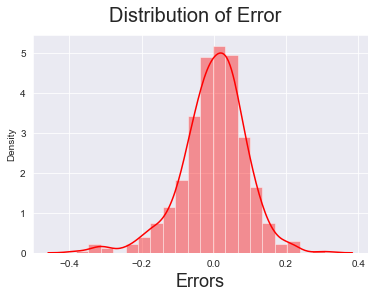

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()

sns.distplot(res_error, bins = 20, color = 'red')

fig.suptitle('Distribution of Error', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

plt.show()

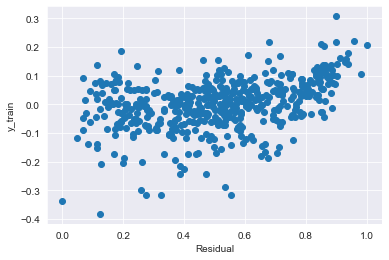

In [73]:
# scatter plot for the check

plt.scatter(y_train,res_error)
plt.ylabel("y_train")
plt.xlabel("Residual")

plt.show()

### Predicting test dataset on the basis of model 8

#### Appliying Scaling on test set

In [74]:
# taking out the variable which need to be scaled

num_var = ['temp', 'hum', 'windspeed', 'cnt']

ndf_test[num_var] = scaler.transform(ndf_test[num_var])

In [75]:
ndf_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Snow
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [76]:
# seperating dependent and independent variables from datasets

y_test = ndf_test.pop('cnt')
X_test = ndf_test

In [77]:
# Creating new dataframe from X_train dataset

X_test = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

In [78]:
# Predicting y variables

y_pred = lm_8.predict(X_test_new)

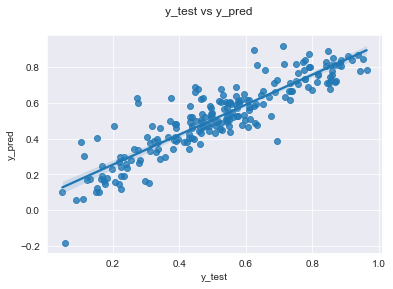

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, data = ndf_test, )
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

#### Check for coefficient of determination (R2_score) and Mean squared error 

In [80]:
# calculate r2_score
r_2 = round(r2_score(y_test, y_pred),4)
r_2 

0.8039

The coefficient of determination of given model is 0.84.

In [81]:
# calculating the mean squared error
sqrt = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
sqrt

0.0965

The lower value of MSE indicates, better fit for the model.

## Conclusion

- By performing multiple linear regression model on the given `BoomBikes` dataset. following conclusions were obtained:
    1. Total rental count is highly associated with the temperature of the region.
    2. The bike rentals were demanding in April to November months based on the month wise data.
    3. People tends to rent bikes during working days than holidays.
    4. If the weather is clear people will rent bikes more often.  


- Ordinary least square model is used for analysis.


- On training model, the value of R-squared value is 0.843 and Adj. R-squared is 0.839.


- Duirng the validation coefficient of determination of the model is obtained as 0.8039 which means the model is 80.39% effenctive. Also the mean square error is also minimum (0.0965) which indicates best fit of model.


- Equation for best fit line is:
$ Cnt = 0.2556 + 0.2289 \times  yr 
               - 0.1127 \times  holiday 
               - 0.0189 \times  workingday
               + 0.5703 \times  temp
               - 0.1708 \times  hum           
               - 0.1935 \times  windspeed 
               + 0.0751 \times  Summer
               + 0.1267 \times  Winter
               - 0.0379 \times  Jan
               - 0.0473 \times  Jul
               + 0.0937 \times  Sept
               - 0.0543 \times  Cloudy
               - 0.2385 \times  Snow   $
    


- The variables which are significant for predicting the bike rental count is as follows:
    1. Weather: Cloudy, snow, temp, hum, windspeed
    2. Month: Jan, Sept, Jul
    3. Season: Summer, Winter
    4. Calender: Year, Holiday, workingday.